In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.13.0


### Import Fashion MNIST dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#### Exploring train data

In [5]:
#Exploring data
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Exploring test data

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

### Preprocessing the data

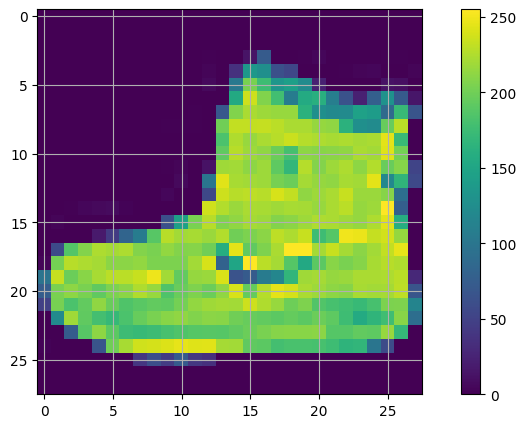

In [10]:
plt.figure(figsize=(10,5))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid()
plt.show()

In [11]:
##Scaling values of train/test between range of 0 to 1 by dividing them by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

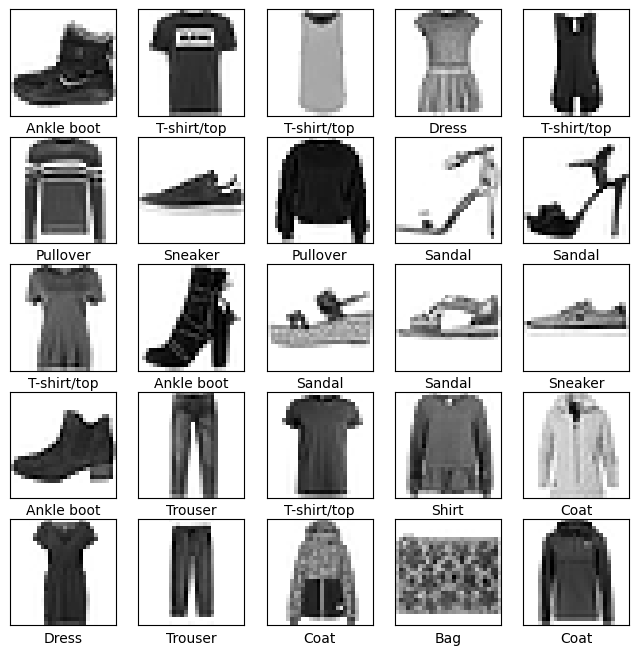

In [12]:
#displaying first 25 images from training set with class name
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build Model

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). 

tf.keras.layers.Dense, These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10

#### Compile the model

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Train the Model

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4985 - accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3750 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3378 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3125 - accuracy: 0.8859
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2937 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2790 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2673 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2561 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2448 - accuracy: 0.9100
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.23

##### This model reaches an accuracy of about 0.90% on the training data

#### Evaluate accuracy

In [17]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest Loss:',test_loss)
print('\nTest Accuracy:',test_accuracy)

313/313 - 1s - loss: 0.3371 - accuracy: 0.8820 - 1s/epoch - 4ms/step

Test Loss: 0.3370753526687622

Test Accuracy: 0.8820000290870667


##### The model is having overfitting because test data is performing poorly in comparision to train data.

#### Make Predictions

In [18]:
#Attaching a softmax layer to convert the model's linear outputs—logits—to probabilities
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [20]:
predictions[0]

array([2.5071948e-08, 2.2425915e-12, 3.8364689e-09, 4.8100623e-10,
       4.2671418e-09, 1.6845408e-04, 6.3921696e-08, 2.6747076e-02,
       9.2705807e-09, 9.7308433e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'lightblue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color= color)

In [24]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.xticks(range(10))
    thisplot = plt.bar(range(10),predictions_array, color = "yellow")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('lightblue')

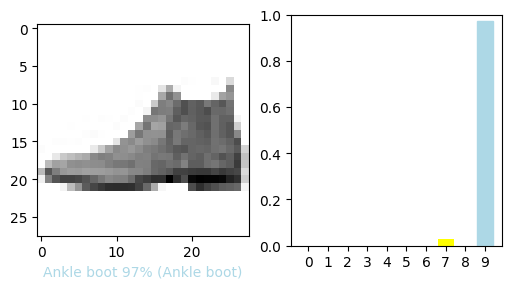

In [25]:
# Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

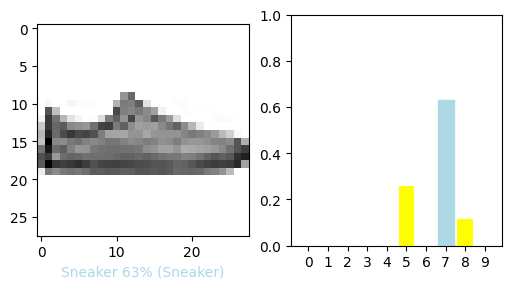

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

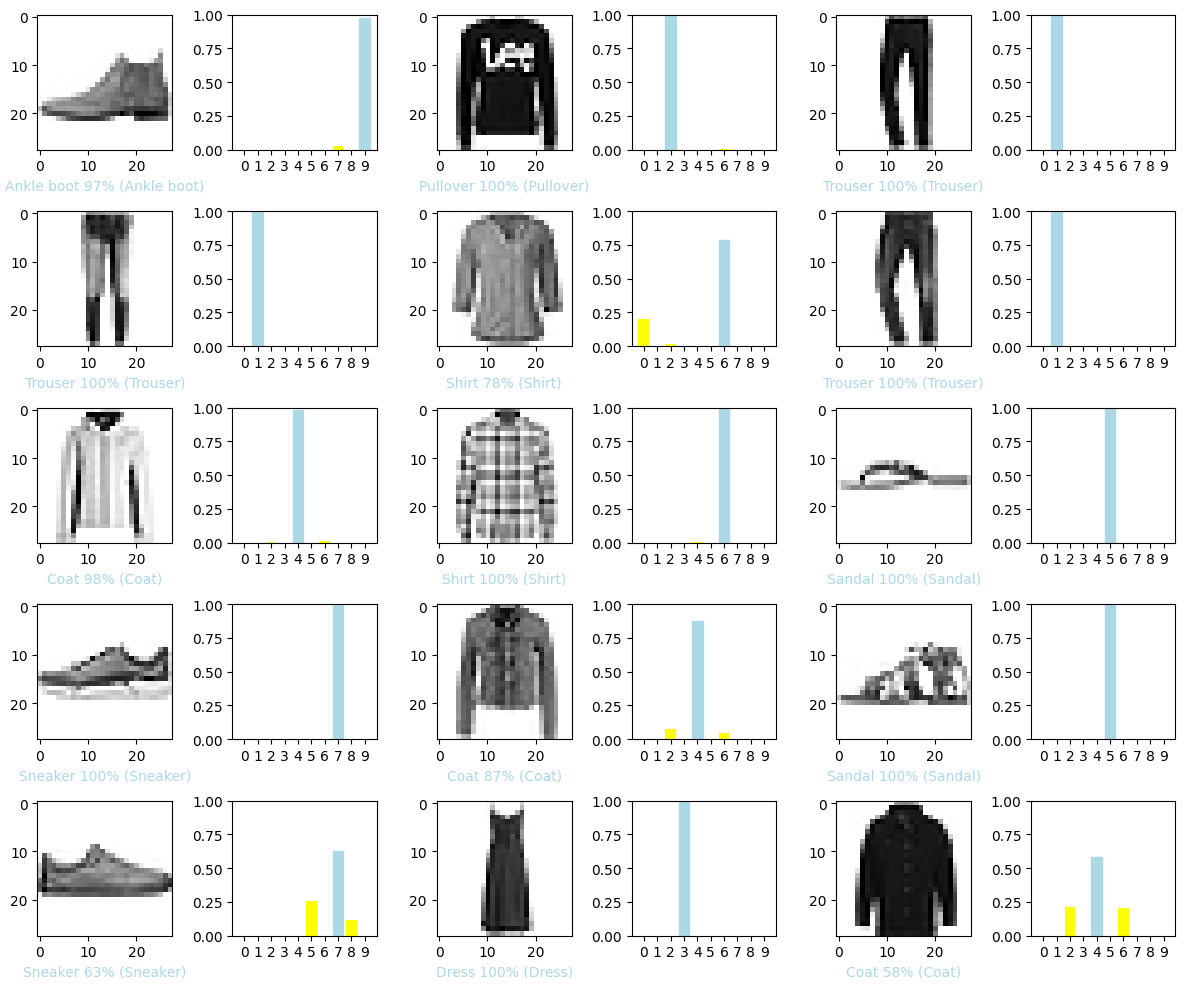

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# using the trained model to make a prediction about a single image.
img = test_images[1]
print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 97ms/step
[[6.1512270e-05 2.1850776e-15 9.9871230e-01 5.5167559e-10 1.4435030e-04
  2.2291483e-11 1.0818141e-03 8.4886778e-16 4.3626793e-11 9.8362421e-13]]


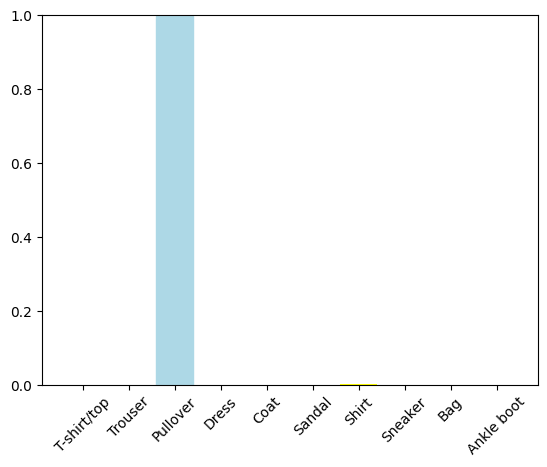

In [31]:
plot_value_array(1,predictions_single[0], test_labels)
_ = plt.xticks(range(10),class_names, rotation = 45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2